In [71]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#import warnings
#warnings.filterwarnings("ignore")



In [2]:
raw_data = pd.read_csv('wine_2020.csv')

In [3]:
raw_data.head()

,fixed acidity,volatile acidity,critric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.567376,0.15,0.820326,1.6,0.174755,243.304154,100.354988,0.9948,3.456648,0.604694,13.297994,7
1,3.006749,0.28,1.602516,1.8,0.341262,218.125676,310.740380,0.9929,2.779328,1.049840,9.134693,5
2,7.354262,0.24,1.138284,7.7,0.303813,153.170821,166.964841,0.9938,2.945272,0.873361,10.592140,6
3,6.942369,0.22,1.090815,10.4,0.084264,116.195476,360.264333,0.9987,3.657075,0.565282,11.219277,6
4,6.235026,0.28,0.101780,8.7,0.096892,123.352272,209.157680,0.9961,2.971558,0.896674,10.438754,5


In [4]:
raw_data.info()
#non missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4000 non-null   float64
 1   volatile acidity      4000 non-null   float64
 2   critric acid          4000 non-null   float64
 3   residual sugar        4000 non-null   float64
 4   chlorides             4000 non-null   float64
 5   free sulfur dioxide   4000 non-null   float64
 6   total sulfur dioxide  4000 non-null   float64
 7   density               4000 non-null   float64
 8   pH                    4000 non-null   float64
 9   sulphates             4000 non-null   float64
 10  alcohol               4000 non-null   float64
 11  quality               4000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 375.1 KB


In [5]:
#SCALE
x = raw_data.iloc[:,:-1]
x = x.div(x.max()).values

y = raw_data.iloc[:,-1]
y = y.div(y.max()).values.reshape(-1,1)
print(x.shape)

(4000, 11)


In [6]:
###Scale by maximum

#train _test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
X_train.info()
#2800

y_train

In [7]:
## Initialize Neural Network
## parameter 3 layer，input layer size 11，hidden layer 10，out layer 1
#active function segmoid
#alpha 0.00001
input_layer_size= 11
hidden_layer_size= 10
output_layer_size= 1

# initialize the weights parameters
np.random.seed(0)
W1= np.random.randn(input_layer_size, hidden_layer_size)
W2= np.random.randn(hidden_layer_size, output_layer_size)
# define learning rate of gradient descent
alpha= 0.0001

a1 = x

#scale
W1

In [9]:
##3 steps 
#1. forward propagation to get loss function
#2. back propagation to updated weight
#3. gradient descent to get best model 

In [111]:
## define active function
def sigmoid(x):
    # our activation function: f(x) = 1 / (1 * e^(-x))
    return (1 / (1+ np.exp(-x)))

def sigmoidDerivationx(y):
    return (y * (1 - y))

def test_error(loss):
    #for i in range(len(pred)):
        #result = result + (pred[i] - test[i])**2/2
    return np.sum(np.power(loss,2))/2



delta3 = (a3-np.array(y_train).reshape(-1,1))*sigmoidDerivationx(z3)
dW2 = a2.T.dot(delta3)
delta2 = (delta3.dot(W2.T))*sigmoidDerivationx(z2)
dw1 = a1.T.dot(delta2)
# 10x10


In [131]:
#forward propagation
#loss function 

def forward(inputs,weight1,weight2):
    z2 = np.dot(inputs,weight1) 
    a2 = sigmoid(z2)
    z3 = np.dot(a2,weight2)
    a3 = sigmoid(z3)#最后的结果 但是没有做loss
    return a2,a3

In [132]:
# back propagation
def backward(forward,inputs):
    delta3 = (forward[1]-y)*sigmoidDerivationx(forward[1])
    dW2 = np.dot(forward[0].T,delta3)#forward[2].T.dot(delta3)
    delta2 = (delta3*W2.T)*sigmoidDerivationx(forward[0])
    dW1 = np.dot(a1.T,delta2)
    return dW1,dW2
         

In [133]:
def gradient_descent(weight1,weight2,dW1,dW2,alpha):
    newW1 = weight1 - alpha*dW1
    newW2 = weight2 - alpha*dW2
    return newW1,newW2
    

In [155]:
#to store loss for plot
loss_set=[]
for i in range(10000):
    result_forward = forward(a1,W1,W2)
    #loss = result_forward[1]-y
    result_backward = backward(result_forward,a1)
    result_gradient = gradient_descent(W1,W2,result_backward[0],result_backward[1],alpha)
    W1 = result_gradient[0]
    W2 = result_gradient[1]
    result_forward_new = forward(a1,W1,W2)
    loss = result_forward_new[1]-y
    loss_set.append(test_error(loss))  
    



loss_set

#one iteration
#再用新的dw1 dw2 去run fo
#先试一次
result_forward = forward(a1,W1,W2)
result_backward = backward(result_forward,a1)
result_gradient = gradient_descent(W1,W2,result_backward[0],result_backward[1],alpha)
result_gradient

##
%time
#iteration = 10000

for i in range(10000):
    result_forward = forward(a1,W1,W2)
    result_backward = backward(result_forward,a1)
    result_gradient = gradient_descent(W1,W2,result_backward[0],result_backward[1],alpha)
    W1 = result_gradient[0]
    W2 = result_gradient[1]





#
loss_set1=[]
for i in range(10000):
    z2 = np.dot(a1,W1) 
    a2 = sigmoid(z2)
    z3 = np.dot(a2,W2)
    a3 = sigmoid(z3)#最后的结果 但是没有做loss
    
    
    delta3 = (a3-y)*sigmoidDerivationx(a3)
    dW2 = a2.T.dot(delta3)
    delta2 = (delta3*W2.T)*sigmoidDerivationx(a2)
    dW1 = a1.T.dot(delta2)
    
    
    W1 = W1 - alpha*dW1
    W2 = W2 - alpha*dW2
    
    z2 = np.dot(a1,W1)
    a2 = sigmoid(z2)
    z3 = np.dot(a2,W2)
    a3 = sigmoid(z3)
    loss = a3 - y
    
    loss_set1.append(test_error(loss))
    
    
    



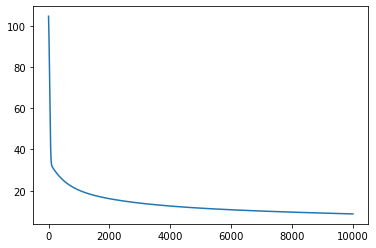

In [157]:
plt.figure()
plt.plot(np.arange(1,10001),loss_set)
plt.show()
#alpha可以更小

In [158]:
loss_set[-1]

8.724770301894573

In [160]:
W2

array([[ 0.73704807],
       [ 1.26593371],
       [-2.2746167 ],
       [ 1.11868777],
       [-0.66899316],
       [ 0.43559584],
       [ 1.05454494],
       [-0.32888345],
       [ 0.17833581],
       [ 0.95878048]])

plt.figure()
plt.plot(np.arange(1,10001),loss_set1)
plt.show()

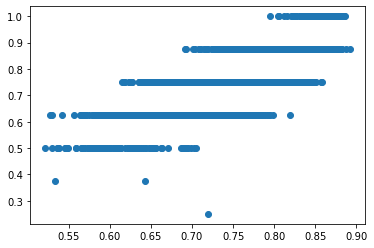

In [159]:
plt.figure()
plt.scatter(result_forward[1],y)
plt.show()

In [ ]:
#Optimising width of hidden layer 
#parameter
## Initialize Neural Network
## parameter 3 layer，input layer size 11，hidden layer 10，out layer 1
#active function segmoid
#alpha 0.00001
input_layer_size= 11
hidden_layer_size= 10
output_layer_size= 1

# initialize the weights parameters
np.random.seed(0)
W1= np.random.randn(input_layer_size, hidden_layer_size)
W2= np.random.randn(hidden_layer_size, output_layer_size)
# define learning rate of gradient descent
alpha= 0.0001

a1 = x


In [161]:
#先单独optimize hidden layer
#2-20
loss_opt_hidden = []
loss_opt_hidden_width = []

for i in range(2,20):
    #set parameter
    input_layer_size= 11
    hidden_layer_size= i
    output_layer_size= 1
    np.random.seed(0)
    W1= np.random.randn(input_layer_size, hidden_layer_size)
    W2= np.random.randn(hidden_layer_size, output_layer_size)
    #set alpha
    alpha= 0.0001
    #set a1 = feature dataset
    a1 = x    
    for i in range(10000):
        result_forward = forward(a1,W1,W2)
        #loss = result_forward[1]-y
        result_backward = backward(result_forward,a1)
        result_gradient = gradient_descent(W1,W2,result_backward[0],result_backward[1],alpha)
        W1 = result_gradient[0]
        W2 = result_gradient[1]
        result_forward_new = forward(a1,W1,W2)
        loss = result_forward_new[1]-y
        loss_opt_hidden.append(test_error(loss))
    #collect loss result of different hidden layers
    loss_opt_hidden_width.append(test_error(loss))
    


In [162]:

loss_opt_hidden_width

[17.369504607973028,
 14.429753548333306,
 12.10813556559531,
 13.132096940788983,
 8.558097193532056,
 10.930116031758962,
 12.616876019644252,
 8.656806600523883,
 8.724770301894573,
 9.28149040377264,
 10.250277115087579,
 10.341821192681207,
 7.697531687461851,
 8.34395281254696,
 8.069916513977095,
 8.022512431675745,
 9.79480871007922,
 8.580191411049114]

In [ ]:
#optmize hidden and alpha
